# Import library

# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from matplotlib import font_manager, rc
%matplotlib inline

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)


# 배경색 흰색으로 맞춰줌
import matplotlib as mpl
mpl.rc('figure', facecolor = 'w', edgecolor ='w')

In [2]:
# Data Load
demo = pd.read_csv('../data/LPOINT_BIG_COMP_01_DEMO.csv', low_memory=False)
pdde = pd.read_csv('../data/LPOINT_BIG_COMP_02_PDDE.csv', low_memory=False)
cop = pd.read_csv('../data/LPOINT_BIG_COMP_03_COP_U.csv', low_memory=False)
clac = pd.read_csv('../data/LPOINT_BIG_COMP_04_PD_CLAC.csv', low_memory=False)
br = pd.read_csv('../data/LPOINT_BIG_COMP_05_BR.csv', low_memory=False)
lpay = pd.read_csv('../data/LPOINT_BIG_COMP_06_LPAY.csv', low_memory=False)

# Column명 변경
demo.columns = ['고객번호', '성별', '연령대', '거주지대분류코드']
pdde.columns = ['고객번호', '영수증번호', '채널구분', '제휴사', '점포코드', '상품코드', '구매일자', '구매시간', '구매금액', '구매수량']
cop.columns = ['고객번호', '영수증번호', '제휴사', '점포코드', '채널구분', '이용일자', '방문일자', '이용시간', '이용금액']
clac.columns = ['상품코드', '소분류명', '대분류명', '중분류명']
br.columns = ['점포코드', '제휴사', '점포대분류코드', '점포중분류코드']
lpay.columns = ['고객번호', '영수증번호', '제휴사', '채널구분', '이용일자', '이용시간', '이용금액']

### [1. demo]: Demo

In [3]:
# demo.head(3)

In [4]:
# # 데이터 타입 확인
# demo.info()

In [5]:
# # 결측치 확인
# demo.isna().sum()

In [6]:
# # 데이터 갯수 확인
# demo.nunique()

In [7]:
# # 성별
# plt.figure(figsize = (7, 4))
# sns.countplot(x='성별', data=demo)
# plt.show()

In [8]:
# # 연령대
# plt.figure(figsize = (7, 4))
# sns.countplot(x='연령대', data=demo)
# plt.show()

In [9]:
# # 거주지대분류코드
# plt.figure(figsize = (7, 4))
# sns.countplot(x='거주지대분류코드', data=demo)
# plt.show()

### [2. pdde]: 상품 구매 정보

In [10]:
# pdde.head(3)

In [11]:
# 중복되는 행 제거 -> 데이터 추출시 고객, 상품 각각 추출하여 중복이 발생한 것으로 판단함
pdde.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [12]:
# # 데이터 타입 확인
# pdde.info()

In [13]:
# # 결측치 확인
# pdde.isna().sum()

In [14]:
# # 상품 구매 정보 테이블 내에 점포 코드 결측치는 온라인으로 주문한 것을 확인할 수 있음. 온라인으로 주문한 뒤에 택배로 수령
# pdde[pdde['점포코드'].isna()]['채널구분'].unique()

In [15]:
# 결측치 치환 -> na값을 온라인으로 채워줌
pdde['점포코드'] = pdde['점포코드'].fillna('온라인')

In [16]:
# # 데이터 갯수 확인
# pdde.nunique()

In [17]:
# # 채널구분
# plt.figure(figsize = (7, 4))
# sns.countplot(x='채널구분', data=pdde)
# plt.show()

In [18]:
# # 제휴사
# plt.figure(figsize = (7, 4))
# sns.countplot(x='제휴사', data=pdde)
# plt.show()

In [19]:
# # 구매시간
# plt.figure(figsize = (7, 4))
# sns.countplot(x='구매시간', data=pdde)
# plt.show()

### [3. cop]: 제휴사 이용 정보

In [20]:
# cop.head(3)

In [21]:
# # 데이터 타입 확인
# cop.info()

In [22]:
# # 결측치 확인
# cop.isna().sum()

In [23]:
# # 제휴사 이용 정보 테이블 내에 점포 코드 결측치는 온라인으로 주문한 것을 확인할 수 있음. 온라인으로 주문한 뒤에 택배로 수령
# cop[cop['점포코드'].isna()]['채널구분'].unique()

In [24]:
# 결측치 치환
cop['점포코드'] = cop['점포코드'].fillna('온라인')

In [25]:
# # 데이터 갯수 확인
# cop.nunique()

In [26]:
# # 채널구분
# plt.figure(figsize = (7, 4))
# sns.countplot(x='채널구분', data=cop)
# plt.show()

In [27]:
# # 제휴사
# plt.figure(figsize = (7, 4))
# sns.countplot(x='제휴사', data=cop)
# plt.show()

In [28]:
# # 이용시간
# plt.figure(figsize = (7, 4))
# sns.countplot(x='이용시간', data=cop)
# plt.show()

### [4. clac]: 상품 분류 정보

In [29]:
# clac.head(3)

In [30]:
# # 데이터 타입 확인
# clac.info()

In [31]:
# # 결측치 확인
# clac.isna().sum()

In [32]:
# # 데이터 갯수 확인
# clac.nunique()

### [5. br]: 점포 정보

In [33]:
# br.head(3)

In [34]:
# # 데이터 타입 확인
# br.info()

In [35]:
# # 결측치 확인
# br.isna().sum()

In [36]:
# # 데이터 갯수 확인
# br.nunique()

In [37]:
# # 제휴사
# plt.figure(figsize = (7, 4))
# sns.countplot(x='제휴사', data=br)
# plt.show()

In [38]:
# # 점포대분류코드
# plt.figure(figsize = (7, 4))
# sns.countplot(x='점포대분류코드', data=br)
# plt.show()

### [6. lpay]: 엘페이 이용

In [39]:
# lpay.head(3)

In [40]:
# # 데이터 타입 확인
# lpay.info()

In [41]:
# # 결측치 확인
# lpay.isna().sum()

In [42]:
# # 데이터 갯수 확인
# lpay.nunique()

In [43]:
# # 제휴사
# plt.figure(figsize = (7, 4))
# sns.countplot(x='제휴사', data=lpay)
# plt.show()

In [44]:
# # 채널구분
# plt.figure(figsize = (7, 4))
# sns.countplot(x='채널구분', data=lpay)
# plt.show()

In [45]:
# # 이용시간
# plt.figure(figsize = (7, 4))
# sns.countplot(x='이용시간', data=lpay)
# plt.show()

# Data Merge

In [46]:
# # 데이터 크기 확인
# print('pdde :',pdde.shape)
# print('copu :',cop.shape)
# print('lpay :',lpay.shape)

In [47]:
# # 칼럼별 상관관계 확인
# # 제휴사 테이블 중에서 방문일자와 이용일자는 상관관계가 상당히 높게 나타남을 확인
# # 제휴사 테이블 내 방문일자 제거
# plt.figure(figsize=(15,15))
# sns.heatmap(data = cop.corr(), annot=True,fmt = '.2f', linewidths=.5, cmap='Blues')

In [48]:
# 데이터를 통합하기 위하여 칼럼 통합
pdde['타입'] = 'Product'
cop['타입'] = 'Affiliate'
lpay['타입'] = 'Lpay'
pdde['방문일자'] = 0
lpay['방문일자'] = 0
cop['구매수량'] = 0
cop['상품코드'] = np.nan
lpay['점포코드'] = np.nan
lpay['상품코드'] = np.nan
lpay['구매수량'] = 0

In [49]:
# 칼럼명을 새롭게 동일하게 통일
cop.columns = ['고객번호', '영수증번호', '제휴사', '점포코드', '채널구분', '구매일자', '방문일자', '구매시간', '구매금액', '타입', '구매수량', '상품코드']
lpay.columns = ['고객번호', '영수증번호', '제휴사', '채널구분', '구매일자', '구매시간', '구매금액', '타입', '방문일자', '점포코드', '상품코드', '구매수량']

# 상품구매데이터를 기준으로 하여 열을 통일
cop = cop[['고객번호', '영수증번호', '채널구분', '제휴사', '점포코드', '상품코드', '구매일자', '방문일자', '구매시간', '구매금액', '구매수량', '타입']]
lpay = lpay[['고객번호', '영수증번호', '채널구분', '제휴사', '점포코드', '상품코드', '구매일자', '방문일자', '구매시간', '구매금액', '구매수량', '타입']]

# 데이터 타입 변경
lpay['영수증번호'] = lpay['영수증번호'].astype('object')
lpay['점포코드'] = lpay['점포코드'].astype('object')
cop['상품코드'] = cop['상품코드'].astype('object')
lpay['상품코드'] = lpay['상품코드'].astype('object')
pdde['구매금액'] = pdde['구매금액'].astype('int')
pdde['방문일자'] = pdde['방문일자'].astype('int64')
lpay['방문일자'] = lpay['방문일자'].astype('int64')

In [50]:
# 데이터 concat
df = pd.concat([pdde,cop,lpay])
# 고객 정보 테이븛 통합
df = pd.merge(df, demo, on = ['고객번호'], how = 'left')
# 상품 분류 테이블 통합
df = pd.merge(df, br, on = ['점포코드','제휴사'], how = 'left')
# 점포 정보 테이블 통합
df = pd.merge(df, clac, on = ['상품코드'], how = 'left')

In [51]:
# 결측치 확인
df.isnull().sum()

고객번호             0
영수증번호            0
채널구분             0
제휴사              0
점포코드        353184
상품코드        601488
구매일자             0
구매시간             0
구매금액             0
구매수량             0
타입               0
방문일자             0
성별               0
연령대              0
거주지대분류코드         0
점포대분류코드     729023
점포중분류코드     729023
소분류명        601488
대분류명        601488
중분류명        601488
dtype: int64

In [52]:
# print('<엘페이>')
# print(lpay.isnull().sum())
# print('<제휴사>')
# print(cop.isnull().sum())
# print('<상품구매>')
# print(pdde.isnull().sum())

In [53]:
# data = df.copy()

In [54]:
# # 데이터 분리
# df1 = data[data['타입']== 'Product']
# df2 = data[data['타입']== 'Affiliate']
# df3 = data[data['타입']== 'Lpay']

In [55]:
df['날짜'] = df['구매일자'].astype(str)
df['날짜'] = pd.to_datetime(df['날짜'])
# df['날짜'] = df['날짜'].dt.tz_localize('UTC')

In [56]:
df = df.sort_values(by=['날짜'], ascending=[True])
df['diff'] = df.groupby('고객번호')['날짜'].diff().fillna('0').astype(str)
df['diff'] = df['diff'].apply(lambda x: int(x.split()[0]))

In [57]:
df['diff'].nunique()

321

In [58]:
imp = df.groupby('고객번호')[['영수증번호']].count().reset_index()

# 구매를 가장 많이한 고객의 고객번호
# imp[imp['영수증번호']==13636]

In [59]:
# # 구매횟수별로 정렬
# imp.sort_values(by=['영수증번호'], ascending=[False])

In [60]:
imp['영수증번호'].describe()

count    29874.000000
mean       158.863125
std        226.480154
min          1.000000
25%         20.000000
50%         83.000000
75%        211.000000
max      13120.000000
Name: 영수증번호, dtype: float64

### 3사분위 수 이상 구매한 고객 EDA

- 연령대 -> 별다른 특이점 찾지 못함

In [61]:
demo_high = demo.loc[demo['고객번호'].isin(imp[imp['영수증번호'] >= 211]['고객번호'].tolist())]

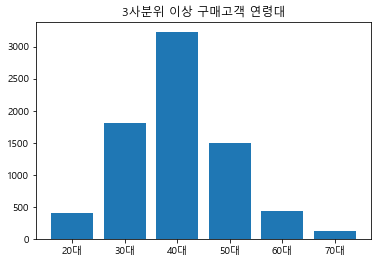

In [62]:
# 3사분위수 이상 구매를 한 고객의 연령대
plt.bar(demo_high.groupby('연령대').count()['고객번호'].reset_index()['연령대'], demo_high.groupby('연령대').count()['고객번호'].reset_index()['고객번호'])
plt.title('3사분위 이상 구매고객 연령대')
plt.show()

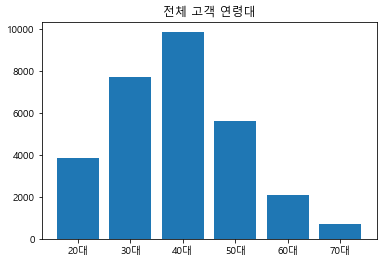

In [63]:
# 전체 고객의 연령대
plt.bar(demo.groupby('연령대').count()['고객번호'].reset_index()['연령대'], demo.groupby('연령대').count()['고객번호'].reset_index()['고객번호'])
plt.title('전체 고객 연령대')
plt.show()

- 성별 -> 별다른 특이점 찾지 못함

In [64]:
demo_high.groupby('성별').count()['고객번호'] / demo_high.groupby('성별').count()['고객번호'].sum()

성별
남성    0.279318
여성    0.720682
Name: 고객번호, dtype: float64

In [65]:
demo.groupby('성별').count()['고객번호'] / demo.groupby('성별').count()['고객번호'].sum()

성별
남성    0.32862
여성    0.67138
Name: 고객번호, dtype: float64

- 거주지 -> 의미없음

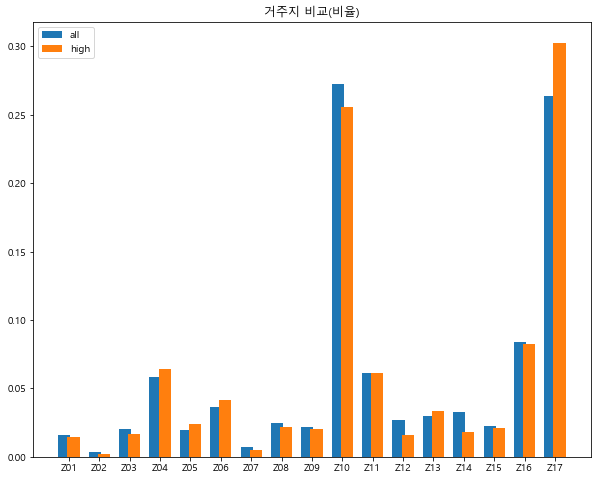

In [66]:
x = np.arange(len(demo.groupby('거주지대분류코드').count()))

plt.figure(figsize=(10, 8))
plt.bar(x-0.15, demo.groupby('거주지대분류코드').count().reset_index()['고객번호'] / demo.groupby('거주지대분류코드').count().reset_index()['고객번호'].sum(),0.4, label='all') 
plt.bar(x+0.15, demo_high.groupby('거주지대분류코드').count().reset_index()['고객번호'] / demo_high.groupby('거주지대분류코드').count().reset_index()['고객번호'].sum(),0.4, label='high') 
plt.xticks(x, demo.groupby('거주지대분류코드').count().reset_index()['거주지대분류코드'])
plt.legend()
plt.title('거주지 비교(비율)')
plt.show()

- *df에서 특이점을 찾아보자*

In [67]:
df_high = df.loc[df['고객번호'].isin(imp[imp['영수증번호'] >= 211]['고객번호'].tolist())]

- 주 구매 채널이 어떻게 되는지 판단

    - 전체가 나열된 데이터에서 보았을때, 두 데이터 모두 오프라인에서 구매를 한 비율이 압도적임

In [68]:
# 과금러들
df_high.groupby('채널구분').count()['고객번호'] / df_high.groupby('채널구분').count()['고객번호'].sum()

채널구분
1    0.860507
2    0.139493
Name: 고객번호, dtype: float64

In [69]:
# 전체 고객
df.groupby('채널구분').count()['고객번호'] / df.groupby('채널구분').count()['고객번호'].sum()

채널구분
1    0.87068
2    0.12932
Name: 고객번호, dtype: float64

    - 온라인을 사용해본 사용자의 비율을 확인함 (groupby와 max를 통해)

*드디어 나름 의미있는 결과가 나타남 -> 과금러들 중에 오프라인만 사용해본 사용자는 32% / 온라인을 사용해본 사용자는 68%*

*전체 고객과 비교해 보았을 때, 온라인을 경험해본 사용자의 수가 높음을 알 수 있음*

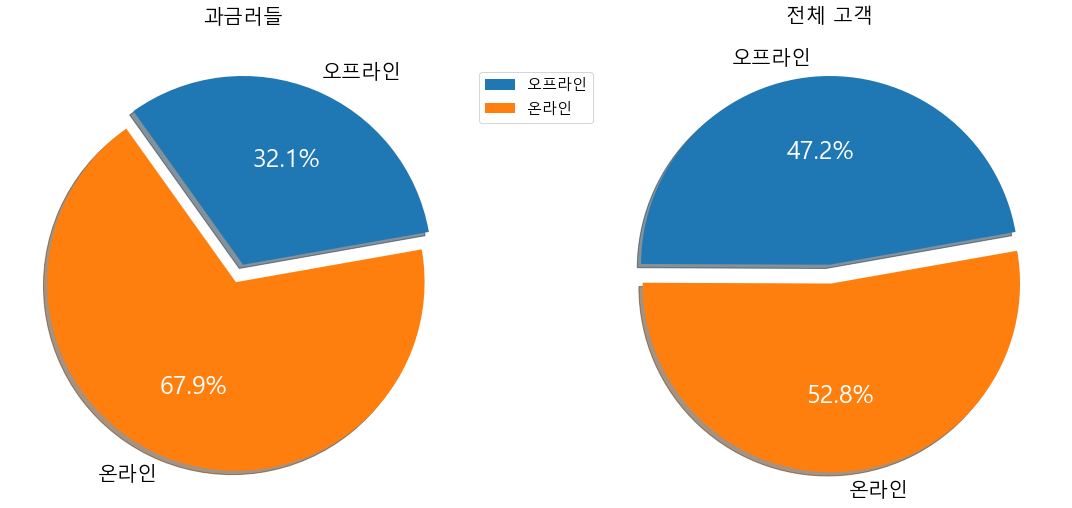

In [70]:
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
patches_high, texts_high, autotexts_high = plt.pie(
    df_high.groupby('고객번호')['채널구분'].max().reset_index().groupby('채널구분').count().reset_index()['고객번호'],
    labels = ['오프라인', '온라인'],
    labeldistance=1.1,## label이 파이로부터 얼마나 떨어지는가, 1일경우 딱 붙어있음. 
    explode=[0, 0.1], ##pie가 튀어나오는지 정해줌  
    startangle=10,## 어디에서 시작할지, 정해줌  
    shadow=True, ##그림자 
    autopct='%1.1f%%', ## pi 위에 표시될 글자 형태, 또한 알아서 %로 변환해서 알려줌 
)
plt.title('과금러들', size = 20)
plt.legend(loc = (1, 0.8), fontsize=15)

plt.subplot(2, 2, 2)
patches, texts, autotexts = plt.pie(
    df.groupby('고객번호')['채널구분'].max().reset_index().groupby('채널구분').count().reset_index()['고객번호'],
    labels = ['오프라인', '온라인'],
    labeldistance=1.1,## label이 파이로부터 얼마나 떨어지는가, 1일경우 딱 붙어있음. 
    explode=[0, 0.1], ##pie가 튀어나오는지 정해줌  
    startangle=10,## 어디에서 시작할지, 정해줌  
    shadow=True, ##그림자 
    autopct='%1.1f%%', ## pi 위에 표시될 글자 형태, 또한 알아서 %로 변환해서 알려줌 
)
plt.title('전체 고객', size = 20)

for t in autotexts_high:
    t.set_color("white")
    t.set_fontsize(25)

for t in texts_high:
    t.set_fontsize(20)

for t in autotexts:
    t.set_color("white")
    t.set_fontsize(25)
    
for t in texts:
    t.set_fontsize(20)    

plt.tight_layout()
plt.show()

- ing~

In [71]:
df_high.groupby('고객번호')['구매금액'].mean().describe()

count    7.504000e+03
mean     2.469288e+04
std      6.354409e+04
min      1.284488e+03
25%      6.779114e+03
50%      1.072608e+04
75%      2.125653e+04
max      2.413200e+06
Name: 구매금액, dtype: float64

In [73]:
df[df['구매수량'] == 0]['타입'].unique()

array(['Affiliate', 'Lpay'], dtype=object)

In [75]:
customer_id = df.groupby('고객번호')[['구매일자']].max().index.tolist()
recency = df.groupby('고객번호')[['구매일자']].max()['구매일자'].tolist()
frequency = df.groupby('고객번호')[['영수증번호']].count()['영수증번호'].tolist()
monetary = df.groupby('고객번호')[['구매금액']].sum()['구매금액'].tolist()

df_rfm = pd.DataFrame({'Customer_ID': customer_id, 'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

In [76]:
df_rfm['Recency'] = df_rfm['Recency'].astype(str)
df_rfm['Recency'] = pd.to_datetime(df_rfm['Recency'])
df_rfm['Recency'] = df_rfm['Recency'] - pd.to_datetime('20210101')
df_rfm['Recency'] = [x.total_seconds() for x in df_rfm['Recency']]
df_rfm

,Customer_ID,Recency,Frequency,Monetary
0,M000034966,30758400.0,49,616240
1,M000059535,5270400.0,1,46000
2,M000136117,31363200.0,121,28697031
3,M000201112,28598400.0,20,51420
4,M000225114,31449600.0,163,2084270
...,...,...,...,...
29869,M999708287,21081600.0,2,60000
29870,M999770689,31449600.0,402,2078770
29871,M999849895,28857600.0,70,1095312
29872,M999926092,28944000.0,7,129500


In [98]:
def get_score(level, data, reverse = False):
    '''
    Description :
    level안에 있는 원소를 기준으로
    1 ~ len(level)+ 1 까지 점수를 부여하는 함수
    
    Parameters :
    level = 튜플 또는 리스트 타입의 숫자형 데이터이며 반드시 오름차순으로 정렬되어 있어야함.
    예 - [1,2,3,4,5] O, [5,4,3,2,1] X, [1,3,2,10,4] X 
    data = 점수를 부여할 데이터. 순회가능한(iterable) 데이터 형식
    reverse = 점수가 높을 때 그에 해당하는 값을 낮게 설정하고 싶을 때 True
    return :
    점수를 담고 있는 리스트 반환
    '''
    score = [] 
    for j in range(len(data)): 
        for i in range(len(level)): 
            if data[j] <= level[i]: 
                score.append(i+1) 
                break 
            elif data[j] > max(level): 
                score.append(len(level)+1) 
                break 
            else: 
                continue
    if reverse:
        return [len(level)+2-x for x in score]
    else:
        return score

def get_rfm_grade(df, num_class, rfm_tick_point, rfm_col_map, suffix=None):
    '''
    Description :
    개별 고객에 대한 최근방문일/방문횟수/구매금액 데이터가 주어졌을때
    최근방문일/방문횟수/구매금액 점수를 계산하여 주어진 데이터 오른쪽에 붙여줍니다.
    
    Parameters :
    df = pandas.DataFrame 데이터
    num_class = 등급(점수) 개수
    rfm_tick_point = 최근방문일/방문횟수/구매금액에 대해서 등급을 나눌 기준이 되는 값
                    'quantile', 'min_max' 또는 리스트를 통하여 직접 값을 정할 수 있음.
                    단, 리스트 사용시 원소의 개수는 반드시 num_class - 1 이어야함.
                    quatile = 데이터의 분위수를 기준으로 점수를 매김
                    min_max = 데이터의 최소값과 최대값을 동일 간격으로 나누어 점수를 매김
    rfm_col_map = 최근방문일/방문횟수/구매금액에 대응하는 칼럼명
    예 - {'R':'Recency','F':'Frequency','M':'Monetary'}
    suffix = 최근방문일/방문횟수/구매금액에 대응하는 칼럼명 뒤에 붙는 접미사
    Return : 
    pandas.DataFrame
    '''
    ##### 필요모듈 체크
    import pandas as pd
    import numpy as np
    from sklearn import preprocessing
    
    ##### 파라미터 체크
    if not isinstance(df, pd.DataFrame): ## 데이터는 pd.DataFrame이어야 함.
        print('데이터는 pandas.DataFrame 객체여야 합니다.')
        return
    
    if isinstance(rfm_tick_point, dict) == False or isinstance(rfm_col_map, dict) == False: ## rfm_tick_point와 rfm_col_map은 모두 딕셔너리
        print(f'rfm_tick_point와 rfm_col_map은 모두 딕셔너리여야합니다.')
        return
    
    if len(rfm_col_map) != 3: ## rfm_col_map에는 반드시 3개의 키를 가져아함.
        print(f'rfm_col_map인자는 반드시 3개의 키를 가져야합니다. \n현재 rfm_col_map에는 {len(rfm_col_map)}개의 키가 있습니다.')
        return
    
    if len(rfm_tick_point) != 3: ## rfm_tick_point에는 반드시 3개의 키를 가져아함.
        print(f'rfm_tick_point인자는 반드시 3개의 키를 가져야합니다. \n현재 rfm_col_map에는 {len(rfm_col_map)}개의 키가 있습니다.')
        return
    
    if set(rfm_tick_point.keys()) != set(rfm_col_map.keys()): ## rfm_tick_point와 rfm_col_map은 같은 키를 가져야함.
        print(f'rfm_tick_point와 rfm_col_map은 같은 키를 가져야 합니다.')
        return
    
    if not set(rfm_col_map.values()).issubset(set(df.columns)):
        not_in_df = set(rfm_col_map.values())-set(df.columns)
        print(f'{not_in_df}이 데이터 칼럼에 있어야 합니다.')
        return
    
    for k, v in rfm_tick_point.items():
        if isinstance(v, str):
            if not v in ['quantile','min_max']:
                print(f'{k}의 값은 "quantile" 또는 "min_max"중에 하나여야 합니다.')
                return
        elif isinstance(v,list) or isinstance(v,tuple):
            if len(v) != num_class-1:
                print(f'{k}에 대응하는 리스트(튜플)의 원소는 {num_class-1}개여야 합니다.')
                return
    
    if suffix:
        if not isinstance(suffix, str):
            print('suffix인자는 문자열이어야합니다.')
            return
        
    ##### 최근방문일/방문횟수/구매금액 점수 부여
    for k, v in rfm_tick_point.items():
        if isinstance(v,str):
            if v == 'quantile':
                ## 데이터 변환
                scale = preprocessing.StandardScaler() ## 데이터의 범위 조작하기 쉽게 해주는 클래스 
                temp_data = np.array(df[rfm_col_map[k]]) ## 데이터를 Numpy 배열로 변환
                temp_data = temp_data.reshape((-1,1)) ## scale을 적용하기위해 1차원 배열을 2차원으로 변환
                temp_data = scale.fit_transform(temp_data) ## 데이터를 평균은 0, 표준편차는 1을 갖도록 변환 
                temp_data = temp_data.squeeze() ## 데이터를 다시 1차원으로 변환

                ## 분위수 벡터
                quantiles_level = np.linspace(0,1,num_class+1)[1:-1] ## 분위수를 구할 기준값을 지정 0과 1은 제외
                quantiles = [] ## 분위수를 담을 리스트
                for ql in quantiles_level:
                    quantiles.append(np.quantile(temp_data,ql)) ## 분위수를 계산하고 리스트에 삽입
            else: ## min_max인 경우
                ## 데이터 변환
                temp_data = np.array(df[rfm_col_map[k]])

                ## 등분점 계산
                quantiles = np.linspace(np.min(temp_data),np.max(temp_data),num_class+1)[1:-1] ## 최소값과 최대값을 점수 개수만큼 등간격으로 분할하는 점
        else: ## 직접 구분값을 넣어주는 경우
            temp_data = np.array(df[rfm_col_map[k]])
            quantiles = v ## 직접 구분값을 넣어줌
        score = get_score(quantiles, temp_data) ## 구분값을 기준으로 점수를 부여하고 리스트로 저장한다.
        new_col_name = rfm_col_map[k]+'_'+k ## 점수값을 담는 변수의 이름
        if suffix:
            new_col_name = rfm_col_map[k]+'_'+suffix
        df[new_col_name] = score ## 기존데이터 옆에 점수 데이터를 추가한다.
    return df

In [99]:
######### 사용 예제
rfm_tick_point={'R':'quantile','F':'quantile','M':'quantile'} ## 구매금액에 최소값 최대값을 이용한 방법 적용
rfm_col_map={'R':'Recency','F':'Frequency','M':'Monetary'}

result = get_rfm_grade(df=df_rfm, num_class=5, rfm_tick_point=rfm_tick_point, rfm_col_map=rfm_col_map)
result[['Customer_ID','Recency_R','Frequency_F','Monetary_M']]

,Customer_ID,Recency_R,Frequency_F,Monetary_M
0,M000034966,3,2,2
1,M000059535,1,1,1
2,M000136117,5,3,5
3,M000201112,2,2,1
4,M000225114,5,4,4
...,...,...,...,...
29869,M999708287,1,1,1
29870,M999770689,5,5,4
29871,M999849895,2,3,3
29872,M999926092,2,1,1


In [100]:
# result['Recency_R'].value_counts()

In [101]:
# result['Frequency_F'].value_counts()

In [102]:
# result['Monetary_M'].value_counts()

In [103]:
grid_number = 100 ## 눈금 개수, 너무 크게 잡으면 메모리 문제가 발생할 수 있음.
weights = []
for j in range(grid_number+1):
    weights += [(i/grid_number,j/grid_number,(grid_number-i-j)/grid_number)
                  for i in range(grid_number+1-j)]
num_class = 5 ## 클래스 개수
class_level = np.linspace(1,5,num_class+1)[1:-1] ## 클래스를 나누는 지점을 정한다.
total_amount_of_sales = result['Monetary'].sum() ## 구매금액 총합 = 총 매출

In [107]:
max_std = 0 ## 표준편차 초기값
for w in tqdm(weights,position=0,desc = '[Finding Optimal weights]'):
    ## 주어진 가중치에 따른 고객별 점수 계산
    score = w[0]*result['Recency_R'] + \
                        w[1]*result['Frequency_F'] + \
                        w[2]*result['Monetary_M'] 
    result['Class'] = get_score(class_level,score,True) ## 점수를 이용하여 고객별 등급 부여
    ## 등급별로 구매금액을 집계한다.
    grouped_result = result.groupby('Class')['Monetary'].sum().reset_index()
    
    ## 제약조건 추가 - 등급이 높은 고객들의 매출이 낮은 등급의 고객들보다 커야한다.
    grouped_result = grouped_result.sort_values('Class')
    
    temp_monetary = list(grouped_result['Monetary'])
    if temp_monetary != sorted(temp_monetary,reverse=True):
        continue
    
    ## 클래스별 구매금액을 총구매금액으로 나누어 클래스별 매출 기여도 계산
    grouped_result['Monetary'] = grouped_result['Monetary'].map(lambda x : x/total_amount_of_sales)
    std_sales = grouped_result['Monetary'].std() ## 매출 기여도의 표준편차 계산
    if max_std <= std_sales:
        max_std = std_sales ## 표준편차 최대값 업데이트
        optimal_weights = w  ## 가중치 업데이트

[Finding Optimal weights]: 100%|███████████████████████████████████████████████████| 5151/5151 [26:45<00:00,  3.21it/s]


In [108]:
print(optimal_weights)

(0.0, 0.26, 0.74)


- 가중치와 RFM점수를 계산하여 그룹을 나누어줌

In [109]:
score = optimal_weights[0]*result['Recency_R'] + \
        optimal_weights[1]*result['Frequency_F'] + \
        optimal_weights[2]*result['Monetary_M'] ## 고객별 점수 계산
 
result['Class'] = get_score(class_level,score,True) ## 고객별 등급 부여

- 각 등급별 매출 기여도 확인

In [111]:
## 클래스별 고객 수 계산
temp_rfm_score1 = result.groupby('Class')['Customer_ID'].count().reset_index().rename(columns={'Customer_ID':'Count'})
 
## 클래스별 구매금액(매출)계산
temp_rfm_score2 = result.groupby('Class')['Monetary'].sum().reset_index()
 
## 클래스별 매출 기여도 계산
temp_rfm_score2['Monetary'] = temp_rfm_score2['Monetary'].map(lambda x : x/total_amount_of_sales)
 
## 데이터 결합
result_df = pd.merge(temp_rfm_score1,temp_rfm_score2,how='left',on=('Class'))

In [112]:
result_df

,Class,Count,Monetary
0,1,8005,0.806047
1,2,4554,0.104676
2,3,5175,0.058467
3,4,5124,0.023567
4,5,7016,0.007243


In [114]:
result_df['Count'].sum()

29874

In [127]:
result.head()

,Customer_ID,Recency,Frequency,Monetary,Recency_R,Frequency_F,Monetary_M,Class
0,M000034966,30758400.0,49,616240,3,2,2,4
1,M000059535,5270400.0,1,46000,1,1,1,5
2,M000136117,31363200.0,121,28697031,5,3,5,1
3,M000201112,28598400.0,20,51420,2,2,1,5
4,M000225114,31449600.0,163,2084270,5,4,4,2


In [126]:
result[result['Class'] == 5]['Monetary_M'].value_counts()

1    5976
2    1040
Name: Monetary_M, dtype: int64

In [136]:
demo.loc[demo['고객번호'].isin(list(result[result['Class'] == 5]['Customer_ID']))].groupby('연령대').count()['고객번호']

연령대
20대    1701
30대    1825
40대    1596
50대    1191
60대     529
70대     174
Name: 고객번호, dtype: int64

## END